<a href="https://colab.research.google.com/github/Bishnu7781/python/blob/main/CNN_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [7]:
print("Total Classes:", ds_info.features['label'].num_classes)
print("Sample Classes:", ds_info.features['label'].names[:10])

Total Classes: 101
Sample Classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [8]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0             # Normalize pixels [0,1]
    return image, label

# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

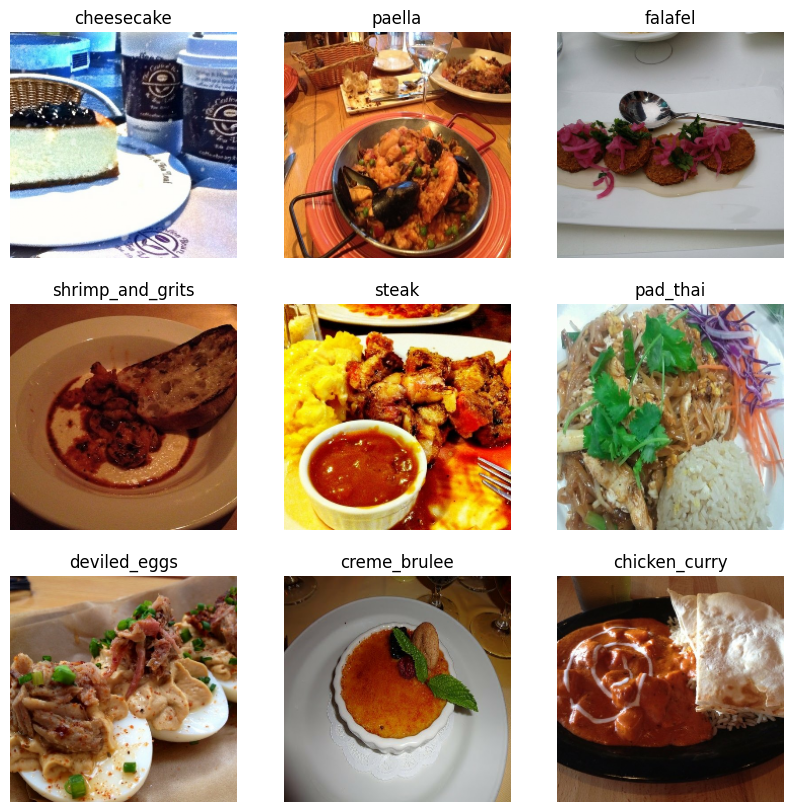

In [9]:
for images, labels in ds_train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        label = ds_info.features['label'].int2str(labels[i].numpy())
        plt.title(label)
        plt.axis("off")
    plt.show()


In [10]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),       # Flatten feature maps
    tf.keras.layers.Dense(101, activation='softmax')  # 101 food categories
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(ds_train, epochs=1, validation_data=ds_test)

2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5751 - loss: 1.6578

In [ ]:
loss, accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")